<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/05deeplearning/clase_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clase 44 ejercicios

### 1. Dimensional reduction with PCA:

In [1]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [2]:
# Execute the codes in TensorFlow 2.0 without editing those in version 1.x (except for the contrib module).
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

#### 1.1. Read in data and preprocess:

In [4]:
# Read data.
data_raw = load_iris()
X = data_raw['data']
y = data_raw['target'].reshape(-1,1)

In [5]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Convert into a DataFrame and view.
header = ['SepalLength','SepalWidth','PetalLength','PetalWidth']      # Column names
df = pd.DataFrame(X_scaled,columns=header)
df.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


#### 1.2. Display the PCA result:

In [7]:
# Reduce to 2 dimension.
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [8]:
# Convert the integer labels into color names.
mycolor = []
for i in y:
    if i == 0:
        mycolor.append('red')
    elif i == 1:
        mycolor.append('green')
    else:
        mycolor.append('blue')

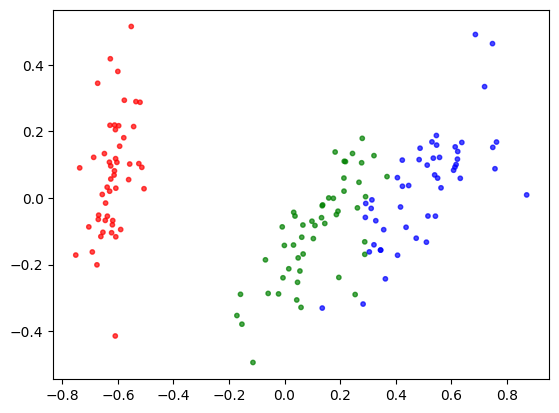

In [9]:
# Visualize.
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
plt.show()

### 2. Dimensional reduction with AutoEncoder:

#### 2.1. Define an AutoEncoder model:

In [10]:
# Hyperparameters definition
n_input = 4             # Input layers has as many nodes as the number of variables.
n_hidden = 2            # The number of nodes in the hidden layer = 2 <= my target.
n_output = n_input      # The output should have the same number of nodes as the input.
learn_rate = 0.0001
n_epochs = 10001

In [11]:
# Variables definition
initializer = tf.variance_scaling_initializer()
W1 = tf.Variable(initializer([n_input, n_hidden]), dtype=tf.float32)
W2 = tf.Variable(initializer([n_hidden, n_output]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros(n_hidden))
b2 = tf.Variable(tf.zeros(n_output))

In [12]:
# Placeholder definition
X_ph = tf.placeholder(tf.float32, shape=[None, n_input])

In [13]:
# AutoEncoder model definition
hidden_layer = tf.matmul(X_ph, W1) + b1                  # No activation.
y_model = tf.matmul(hidden_layer, W2) + b2

In [14]:
loss = tf.reduce_mean(tf.square(X_ph- y_model))         # 'X' takes the place of 'y'.

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)

In [16]:
train = optimizer.minimize(loss)

In [17]:
init = tf.global_variables_initializer()

#### 2.2. AutoEncoder training:

In [18]:
with tf.Session() as sess:
        sess.run(init)
        for i in range(n_epochs):
            my_feed = {X_ph:X_scaled}
            sess.run(train, feed_dict = my_feed)
            if i % 1000 == 0:
                mse = sess.run(loss, feed_dict = my_feed)
                print("Step : {}    ,    MSE : {}".format(i, mse))
        X_auto = sess.run(hidden_layer, feed_dict = my_feed)       # Get the reduced dimensional representation from the hidden layer!!!

Step : 0    ,    MSE : 1.5185779333114624
Step : 1000    ,    MSE : 0.6462854743003845
Step : 2000    ,    MSE : 0.31167635321617126
Step : 3000    ,    MSE : 0.17683759331703186
Step : 4000    ,    MSE : 0.11510463804006577
Step : 5000    ,    MSE : 0.08305052667856216
Step : 6000    ,    MSE : 0.06790950894355774
Step : 7000    ,    MSE : 0.061186715960502625
Step : 8000    ,    MSE : 0.05637688189744949
Step : 9000    ,    MSE : 0.04893912747502327
Step : 10000    ,    MSE : 0.03736294060945511


#### 2.3. Compare the results of PCA vs AutoEncoder:

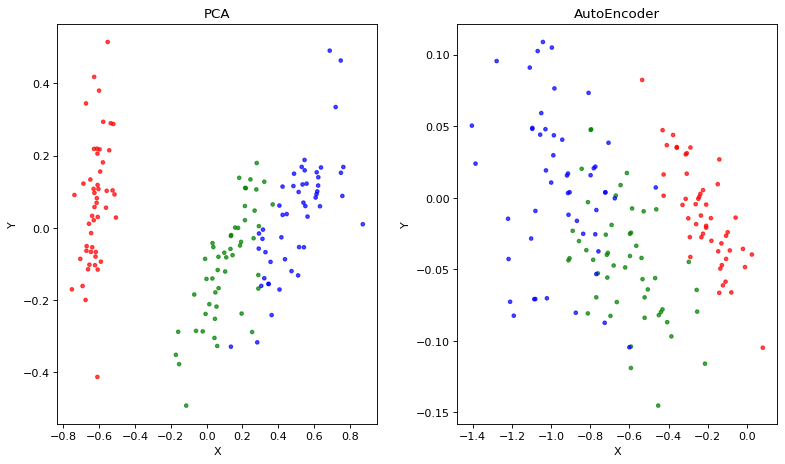

In [19]:
fig=plt.figure(figsize=(10,5), dpi=80)       # figsize= (Width, Height). Set DPI.
axes1 = fig.add_axes([0,0,0.4,1])            # Left, Bottom, Width, Height
axes2 = fig.add_axes([0.5,0,0.4,1])          # Left, Bottom, Width, Height
axes1.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
axes2.scatter(X_auto[:,0],X_auto[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
axes1.set_xlabel('X')
axes1.set_ylabel('Y')
axes1.set_title('PCA')
axes2.set_xlabel('X')
axes2.set_ylabel('Y')
axes2.set_title('AutoEncoder')
plt.show()

In [21]:
# ==========================
# 1. Importación de librerías
# ==========================
import tensorflow as tf
import numpy as np

# --- tamaños ---
image_size = (28, 28)
flat_img = int(np.prod(image_size))   # <— fuerza a int
z_size = 20

# --- generador / discriminador (como ya los definiste) ---
gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=flat_img,        # <— usa int
)

disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size,
    num_output_units=1
)

# --- en lugar de model.build(...), haz un forward dummy ---
_ = gen_model(tf.zeros((1, z_size), dtype=tf.float32))
gen_model.summary()

_ = disc_model(tf.zeros((1, flat_img), dtype=tf.float32))
disc_model.summary()


# ======================================
# 2. Definir la función del Generador
# ======================================
def make_generator_network(
    num_hidden_layers=1,
    num_hidden_units=100,
    num_output_units=784  # 28*28
):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(
            units=num_hidden_units,
            use_bias=False
        ))
        model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Dense(
        units=num_output_units,
        activation="tanh"
    ))
    return model

# ======================================
# 3. Definir la función del Discriminador
# ======================================
def make_discriminator_network(
    num_hidden_layers=1,
    num_hidden_units=100,
    num_output_units=1
):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(units=num_hidden_units))
        model.add(tf.keras.layers.LeakyReLU())
        model.add(tf.keras.layers.Dropout(rate=0.5))

    model.add(tf.keras.layers.Dense(
        units=num_output_units,
        activation=None
    ))
    return model

# ======================================
# 4. Construcción de redes generador/discriminador
# ======================================
image_size = (28, 28)
z_size = 20
mode_z = "uniform"   # 'uniform' vs 'normal'

gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

tf.random.set_seed(1)

gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=np.prod(image_size)
)

gen_model.build(input_shape=(None, z_size))
gen_model.summary()

disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size
)

disc_model.build(input_shape=(None, np.prod(image_size)))
disc_model.summary()

# ======================================
# 5. Definir conjunto de datos de prueba
# ======================================
mnist_bldr = tfds.builder("mnist")
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)

def preprocess(ex, mode="uniform"):
    image = ex["image"]
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.reshape(image, [-1])
    image = image * 2.0 - 1.0  # Escalar a rango [-1, 1]

    if mode == "uniform":
        input_z = tf.random.uniform(
            shape=(z_size,),
            minval=-1.0, maxval=1.0
        )
    elif mode == "normal":
        input_z = tf.random.normal(shape=(z_size,))
    return input_z, image

mnist_trainset = mnist["train"]

print("before preprocessing: ")
example = next(iter(mnist_trainset))["image"]
print("dtype:", example.dtype,
      "minimum:", np.min(example),
      "maximum:", np.max(example))

mnist_trainset = mnist_trainset.map(preprocess)

print("after preprocessing: ")
example = next(iter(mnist_trainset))[0]
print("dtype:", example.dtype,
      "minimum:", np.min(example),
      "maximum:", np.max(example))

# ======================================
# 6. Crear lotes de entrenamiento
# ======================================
mnist_trainset = mnist_trainset.batch(32, drop_remainder=True)
input_z, input_real = next(iter(mnist_trainset))

print("input-z -- shape:", input_z.shape)
print("input-real -- shape:", input_real.shape)

# ======================================
# 7. Propagación hacia adelante
# ======================================
g_output = gen_model(input_z)
print("Generator output -- shape:", g_output.shape)

d_logits_real = disc_model(input_real)
d_logits_fake = disc_model(g_output)

print("discriminator (real) -- shape:", d_logits_real.shape)
print("discriminator (fake) -- shape:", d_logits_fake.shape)

# ======================================
# 8. Definir pérdidas
# ======================================
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Pérdida del generador
g_labels_real = tf.ones_like(d_logits_fake)
g_loss = loss_fn(y_true=g_labels_real, y_pred=d_logits_fake)
print("Generator loss: {:.4f}".format(g_loss))


TypeError: unsupported operand type(s) for /: 'Dimension' and 'int', please use // instead

In [22]:
# ======================================================
# 1) IMPORTS, VERSIONES Y SEMILLAS
# ======================================================
import tensorflow as tf               # Framework principal
import tensorflow_datasets as tfds    # Para cargar MNIST fácilmente
import numpy as np                    # Utilidades numéricas

print("TF:", tf.__version__)

# Fijamos semilla para reproducibilidad de resultados.
tf.random.set_seed(1)
np.random.seed(1)

# ======================================================
# 2) HIPERPARÁMETROS Y TAMAÑOS BÁSICOS
# ======================================================

# Tamaño de imagen de MNIST: 28x28 (escala de grises, 1 canal).
image_size = (28, 28)

# Aplanamos la imagen (28*28=784). Convertimos a int para evitar formas simbólicas.
flat_img = int(np.prod(image_size))  # ✅ importante en TF/Keras 3

# Dimensión del vector latente z (ruido de entrada al generador).
z_size = 20

# Cómo muestreamos z: uniforme en [-1,1] o normal ~N(0,1).
mode_z = "uniform"   # 'uniform' o 'normal'

# Arquitectura mínima (una capa oculta en cada red, 100 unidades).
gen_hidden_layers  = 1
gen_hidden_size    = 100
disc_hidden_layers = 1
disc_hidden_size   = 100

# ======================================================
# 3) DEFINICIÓN DE LOS MODELOS (GENERADOR Y DISCRIMINADOR)
# ======================================================

def make_generator_network(
    num_hidden_layers: int = 1,
    num_hidden_units: int = 100,
    num_output_units: int = 784  # salida = imagen aplanada
):
    """
    Generador: MLP simple que recibe un vector z (ruido) y
    devuelve una 'imagen' aplanada en el rango [-1, 1] (tanh).
    """
    model = tf.keras.Sequential(name="generator")

    # Capas ocultas (todas densas + LeakyReLU). use_bias=False es opcional.
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(units=num_hidden_units, use_bias=False))
        model.add(tf.keras.layers.LeakyReLU())

    # Capa de salida: tamaño 'flat_img' y activación tanh -> [-1, 1]
    model.add(tf.keras.layers.Dense(units=num_output_units, activation="tanh"))
    return model


def make_discriminator_network(
    num_hidden_layers: int = 1,
    num_hidden_units: int = 100,
    num_output_units: int = 1
):
    """
    Discriminador: MLP que toma una imagen aplanada (real o generada)
    y devuelve un logit (sin sigmoide) con activación None.
    """
    model = tf.keras.Sequential(name="discriminator")

    # Capas ocultas densas + LeakyReLU + Dropout (regularización simple).
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(units=num_hidden_units))
        model.add(tf.keras.layers.LeakyReLU())
        model.add(tf.keras.layers.Dropout(rate=0.5))

    # Capa de salida: 1 unidad (logit). from_logits=True en la pérdida.
    model.add(tf.keras.layers.Dense(units=num_output_units, activation=None))
    return model

# ======================================================
# 4) INSTANCIAR MODELOS Y "CONSTRUIRLOS" CON UN FORWARD DUMMY
# ======================================================

# Creamos los modelos con los tamaños definidos arriba.
gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=flat_img      # ✅ usar int (no TensorShape)
)

disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size,
    num_output_units=1
)

# ⚠️ En Keras 3, llamar a .build(...) puede dejar formas simbólicas que rompen .summary()
# Solución: hacer una pasada "dummy" (forward) para concretar las shapes internas.
_ = gen_model(tf.zeros((1, z_size), dtype=tf.float32))           # (batch=1, z_size)
gen_model.summary()

_ = disc_model(tf.zeros((1, flat_img), dtype=tf.float32))        # (batch=1, 784)
disc_model.summary()

# ======================================================
# 5) CARGA DE MNIST Y PREPROCESAMIENTO
# ======================================================

# Descarga/prepare de MNIST con TFDS.
mnist_bldr = tfds.builder("mnist")
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)

def preprocess(ex, mode="uniform"):
    """
    Recibe un ejemplo TFDS {'image': (28,28,1), 'label': ...}
    - Convierte a float32 en [0,1],
    - Aplana a vector de tamaño flat_img,
    - Reescala a [-1,1] (para que case con la salida tanh del generador),
    - Genera un vector z con la distribución indicada.
    Retorna: (input_z, image_vector)
    """
    image = ex["image"]
    image = tf.image.convert_image_dtype(image, tf.float32)  # [0,1]
    image = tf.reshape(image, (flat_img,))                   # ✅ tupla de int
    image = image * 2.0 - 1.0                                # [-1,1]

    if mode == "uniform":
        input_z = tf.random.uniform((z_size,), minval=-1.0, maxval=1.0)
    else:  # 'normal'
        input_z = tf.random.normal((z_size,))
    return input_z, image

# Conjunto de entrenamiento "crudo" (antes del map).
mnist_trainset_raw = mnist["train"]

print("before preprocessing:")
ex_raw = next(iter(mnist_trainset_raw))["image"]
print("dtype:", ex_raw.dtype,
      "min:", tf.reduce_min(ex_raw).numpy(),
      "max:", tf.reduce_max(ex_raw).numpy())

# Aplicamos el preprocesamiento.
mnist_trainset = mnist_trainset_raw.map(lambda ex: preprocess(ex, mode=mode_z))

print("after preprocessing:")
ex_proc = next(iter(mnist_trainset))  # (z, image)
print("z dtype:",   ex_proc[0].dtype, "z shape:",   ex_proc[0].shape)
print("x dtype:",   ex_proc[1].dtype, "x shape:",   ex_proc[1].shape,
      "min:", tf.reduce_min(ex_proc[1]).numpy(),
      "max:", tf.reduce_max(ex_proc[1]).numpy())

# ======================================================
# 6) CREAR LOTES (BATCHING) Y COMPROBAR FORMAS
# ======================================================

batch_size = 32
mnist_trainset = mnist_trainset.batch(batch_size, drop_remainder=True)

# Extraemos un batch de ejemplo: (input_z, input_real)
input_z, input_real = next(iter(mnist_trainset))
print("input-z  shape:", input_z.shape)   # (32, z_size)
print("input-x  shape:", input_real.shape)  # (32, 784)

# ======================================================
# 7) PROPAGACIÓN HACIA ADELANTE (FORWARD PASS DE PRUEBA)
# ======================================================

# Pasamos z por el generador -> imágenes falsas (aplanadas).
g_output = gen_model(input_z, training=False)
print("Generator output shape:", g_output.shape)  # (32, 784)

# Pasamos imágenes reales y falsas por el discriminador -> logits.
d_logits_real = disc_model(input_real, training=False)
d_logits_fake = disc_model(g_output,  training=False)

print("Discriminator (real) logits shape:", d_logits_real.shape)  # (32, 1)
print("Discriminator (fake) logits shape:", d_logits_fake.shape)  # (32, 1)

# ======================================================
# 8) DEFINIR PÉRDIDA DEL GENERADOR (BCE CON LOGITS)
# ======================================================

# Usaremos BinaryCrossentropy con from_logits=True porque el discriminador
# NO tiene sigmoide en la última capa.
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Pérdida del generador: quiere que el discriminador etiquete sus salidas como "reales" (1s).
g_labels_real = tf.ones_like(d_logits_fake)                  # vector de 1s con misma forma
g_loss = loss_fn(y_true=g_labels_real, y_pred=d_logits_fake) # BCE(fake vs 1)
print("Generator loss: {:.4f}".format(g_loss.numpy()))



TF: 2.19.0


TypeError: unsupported operand type(s) for /: 'Dimension' and 'int', please use // instead

In [23]:
# ==========================
# 1. Importación de librerías
# ==========================
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

print("TF:", tf.__version__)

# --- tamaños y semillas ---
image_size = (28, 28)
flat_img = int(np.prod(image_size))   # fuerza a int (evita TensorShape simbólico)
z_size = 20
tf.random.set_seed(1)
np.random.seed(1)

# ======================================
# 2. Definir la función del Generador (API Funcional, con Input explícito)
# ======================================
def make_generator_network(
    z_dim=20,
    num_hidden_layers=1,
    num_hidden_units=100,
    num_output_units=784  # 28*28
):
    """
    Generador MLP: Input z -> capas densas + LeakyReLU -> salida tanh en [-1, 1].
    Se usa API Funcional con tf.keras.Input para fijar shape desde el inicio.
    """
    inputs = tf.keras.Input(shape=(z_dim,), name="z_input")
    x = inputs
    for _ in range(num_hidden_layers):
        x = tf.keras.layers.Dense(units=num_hidden_units, use_bias=False)(x)
        x = tf.keras.layers.LeakyReLU()(x)
    outputs = tf.keras.layers.Dense(units=num_output_units, activation="tanh")(x)
    return tf.keras.Model(inputs, outputs, name="generator")

# ======================================
# 3. Definir la función del Discriminador (API Funcional, con Input explícito)
# ======================================
def make_discriminator_network(
    x_dim=784,
    num_hidden_layers=1,
    num_hidden_units=100,
    num_output_units=1
):
    """
    Discriminador MLP: Input imagen aplanada -> densas + LeakyReLU + Dropout -> logit.
    Salida sin activación (from_logits=True en la pérdida).
    """
    inputs = tf.keras.Input(shape=(x_dim,), name="x_input")
    x = inputs
    for _ in range(num_hidden_layers):
        x = tf.keras.layers.Dense(units=num_hidden_units)(x)
        x = tf.keras.layers.LeakyReLU()(x)
        x = tf.keras.layers.Dropout(rate=0.5)(x)
    outputs = tf.keras.layers.Dense(units=num_output_units, activation=None)(x)
    return tf.keras.Model(inputs, outputs, name="discriminator")

# ======================================
# 4. Construcción de redes generador/discriminador (sin forward dummy)
# ======================================
mode_z = "uniform"   # 'uniform' vs 'normal'
gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

gen_model = make_generator_network(
    z_dim=z_size,
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=flat_img
)
disc_model = make_discriminator_network(
    x_dim=flat_img,
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size,
    num_output_units=1
)

# Con Input explícito, summary() ya conoce las shapes y no falla.
gen_model.summary()
disc_model.summary()

# ======================================
# 5. Definir conjunto de datos de prueba (MNIST) + preprocesamiento
# ======================================
mnist_bldr = tfds.builder("mnist")
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)

def preprocess(ex, mode="uniform"):
    """
    - Convierte imagen a float32 en [0,1]
    - Aplana a vector de tamaño flat_img (int)
    - Reescala a [-1,1]
    - Genera z con distribución 'uniform' o 'normal'
    """
    image = ex["image"]
    image = tf.image.convert_image_dtype(image, tf.float32)  # [0,1]
    image = tf.reshape(image, (flat_img,))                   # tupla de int (no [-1])
    image = image * 2.0 - 1.0                                # [-1,1]

    if mode == "uniform":
        input_z = tf.random.uniform(shape=(z_size,), minval=-1.0, maxval=1.0)
    else:  # 'normal'
        input_z = tf.random.normal(shape=(z_size,))
    return input_z, image

mnist_trainset = mnist["train"]

print("before preprocessing:")
example = next(iter(mnist_trainset))["image"]
print("dtype:", example.dtype,
      "minimum:", tf.reduce_min(example).numpy(),
      "maximum:", tf.reduce_max(example).numpy())

mnist_trainset = mnist_trainset.map(preprocess)

print("after preprocessing:")
example_z, example_x = next(iter(mnist_trainset))
print("z dtype:", example_z.dtype, "z shape:", example_z.shape)
print("x dtype:", example_x.dtype, "x shape:", example_x.shape,
      "min:", tf.reduce_min(example_x).numpy(),
      "max:", tf.reduce_max(example_x).numpy())

# ======================================
# 6. Crear lotes de entrenamiento
# ======================================
mnist_trainset = mnist_trainset.batch(32, drop_remainder=True)
input_z, input_real = next(iter(mnist_trainset))

print("input-z -- shape:", input_z.shape)      # (32, z_size)
print("input-real -- shape:", input_real.shape)  # (32, 784)

# ======================================
# 7. Propagación hacia adelante
# ======================================
g_output = gen_model(input_z, training=False)
print("Generator output -- shape:", g_output.shape)  # (32, 784)

d_logits_real = disc_model(input_real, training=False)
d_logits_fake = disc_model(g_output,  training=False)

print("discriminator (real) -- shape:", d_logits_real.shape)  # (32, 1)
print("discriminator (fake) -- shape:", d_logits_fake.shape)  # (32, 1)

# ======================================
# 8. Definir pérdidas
# ======================================
# Usamos BCE con from_logits=True porque el discriminador NO tiene sigmoide final.
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Pérdida del generador: quiere que el D etiquete como reales sus imágenes falsas.
g_labels_real = tf.ones_like(d_logits_fake)
g_loss = loss_fn(y_true=g_labels_real, y_pred=d_logits_fake)
print("Generator loss: {:.4f}".format(g_loss.numpy()))


TF: 2.19.0


TypeError: unsupported operand type(s) for /: 'Dimension' and 'int', please use // instead

In [ ]:
# ======================================
# 9. Pérdida del Discriminador
# ======================================
# El discriminador necesita dos pérdidas:
# - d_loss_real: cuando clasifica correctamente imágenes reales.
# - d_loss_fake: cuando clasifica correctamente imágenes falsas.

d_labels_real = tf.ones_like(d_logits_real)
d_labels_fake = tf.zeros_like(d_logits_fake)

d_loss_real = loss_fn(y_true=d_labels_real, y_pred=d_logits_real)
d_loss_fake = loss_fn(y_true=d_labels_fake, y_pred=d_logits_fake)

print("Discriminator loss: real {:.4f}, fake {:.4f}".format(
    d_loss_real.numpy(), d_loss_fake.numpy()
))

# ======================================
# 10. Parámetros de entrenamiento
# ======================================
import time

num_epochs = 100
batch_size = 64
image_size = (28, 28)
z_size = 20
mode_z = "uniform"
gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

tf.random.set_seed(1)
np.random.seed(1)

# Vector z fijo para observar el progreso
if mode_z == "uniform":
    fixed_z = tf.random.uniform(
        shape=(batch_size, z_size), minval=-1, maxval=1
    )
elif mode_z == "normal":
    fixed_z = tf.random.normal(shape=(batch_size, z_size))

def create_samples(g_model, input_z):
    g_output = g_model(input_z, training=False)
    images = tf.reshape(g_output, (batch_size, *image_size))
    return (images + 1) / 2.0  # reescala a [0,1]

# ======================================
# 11. Preparar dataset
# ======================================
mnist_trainset = mnist["train"]
mnist_trainset = mnist_trainset.map(lambda ex: preprocess(ex, mode=mode_z))
mnist_trainset = mnist_trainset.shuffle(10000)
mnist_trainset = mnist_trainset.batch(batch_size, drop_remainder=True)

# ======================================
# 12. Construcción de modelos y optimizadores
# ======================================
gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=np.prod(image_size)
)
gen_model.build(input_shape=(None, z_size))

disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size
)
disc_model.build(input_shape=(None, np.prod(image_size)))

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
g_optimizer = tf.keras.optimizers.Adam()
d_optimizer = tf.keras.optimizers.Adam()

# ======================================
# 13. Entrenamiento (loop principal)
# ======================================
all_losses = []
all_d_vals = []
epoch_samples = []

start_time = time.time()

for epoch in range(1, num_epochs+1):
    epoch_losses, epoch_d_vals = [], []

    for i, (input_z, input_real) in enumerate(mnist_trainset):

        # ---------- Entrenamiento del Generador ----------
        with tf.GradientTape() as g_tape:
            g_output = gen_model(input_z)
            d_logits_fake = disc_model(g_output, training=True)
            labels_real = tf.ones_like(d_logits_fake)
            g_loss = loss_fn(y_true=labels_real, y_pred=d_logits_fake)

        g_grads = g_tape.gradient(g_loss, gen_model.trainable_variables)
        g_optimizer.apply_gradients(zip(g_grads, gen_model.trainable_variables))

        # ---------- Entrenamiento del Discriminador ----------
        with tf.GradientTape() as d_tape:
            d_logits_real = disc_model(input_real, training=True)
            d_labels_real = tf.ones_like(d_logits_real)
            d_loss_real = loss_fn(y_true=d_labels_real, y_pred=d_logits_real)

            d_logits_fake = disc_model(g_output, training=True)
            d_labels_fake = tf.zeros_like(d_logits_fake)
            d_loss_fake = loss_fn(y_true=d_labels_fake, y_pred=d_logits_fake)

            d_loss = d_loss_real + d_loss_fake

        d_grads = d_tape.gradient(d_loss, disc_model.trainable_variables)
        d_optimizer.apply_gradients(zip(d_grads, disc_model.trainable_variables))

        # Guardar métricas
        epoch_losses.append((g_loss.numpy(), d_loss_real.numpy(), d_loss_fake.numpy()))
        d_probs_real = tf.reduce_mean(tf.sigmoid(d_logits_real))
        d_probs_fake = tf.reduce_mean(tf.sigmoid(d_logits_fake))
        epoch_d_vals.append((d_probs_real.numpy(), d_probs_fake.numpy()))

    # Fin de la época
    all_losses.append(epoch_losses)
    all_d_vals.append(epoch_d_vals)
    epoch_samples.append(create_samples(gen_model, fixed_z))

    print("epoch {:03d} | time {:.2f} min | Average loss >> Generator/Discriminator {:.4f}/{:.4f} [Discriminator-Real: {:.4f} Discriminator-Fake: {:.4f}]".format(
        epoch, (time.time()-start_time)/60,
        np.mean([l[0] for l in epoch_losses]),
        np.mean([l[1]+l[2] for l in epoch_losses]),
        np.mean([l[1] for l in epoch_losses]),
        np.mean([l[2] for l in epoch_losses])
    ))

# ======================================
# 14. Visualización de pérdidas
# ======================================
import itertools

fig = plt.figure(figsize=(16, 6))

# Gráfico de pérdidas
ax = fig.add_subplot(1, 2, 1)
g_losses = [item[0] for item in itertools.chain(*all_losses)]
d_losses = [item[1]+item[2] for item in itertools.chain(*all_losses)]

plt.plot(g_losses, label="Generator loss", alpha=0.75)
plt.plot(d_losses, label="Discriminator loss", alpha=0.95)
plt.legend(fontsize=20)
ax.set_xlabel("Iteration", size=15)
ax.set_ylabel("Loss", size=15)

# Probabilidades del discriminador
ax2 = fig.add_subplot(1, 2, 2)
d_vals_real = [item[0] for item in itertools.chain(*all_d_vals)]
d_vals_fake = [item[1] for item in itertools.chain(*all_d_vals)]

plt.plot(d_vals_real, alpha=0.75, label="Real")
plt.plot(d_vals_fake, alpha=0.75, label="Fake")
plt.legend(fontsize=20)
ax2.set_xlabel("Iteration", size=15)
ax2.set_ylabel("Discriminator output", size=15)

plt.show()


In [ ]:
# ======================================================
# GAN con TensorFlow/Keras – Ejemplo completo
# ======================================================

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time

# ------------------------------------------------------
# 1. Definir funciones auxiliares: Generador y Discriminador
# ------------------------------------------------------

def make_generator_network(num_hidden_layers=1, num_hidden_units=100, num_output_units=784):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(
            units=num_hidden_units,
            use_bias=False
        ))
        model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(units=num_output_units, activation='tanh'))
    return model


def make_discriminator_network(num_hidden_layers=1, num_hidden_units=100, num_output_units=1):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(units=num_hidden_units))
        model.add(tf.keras.layers.LeakyReLU())
        model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(units=num_output_units, activation=None))
    return model

# ------------------------------------------------------
# 2. Construcción de redes generadora y discriminadora
# ------------------------------------------------------

image_size = (28, 28)
z_size = 20
mode_z = 'uniform'  # 'uniform' o 'normal'
gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

tf.random.set_seed(1)

gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=np.prod(image_size)
)

gen_model.build(input_shape=(None, z_size))
gen_model.summary()

disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size
)

disc_model.build(input_shape=(None, np.prod(image_size)))
disc_model.summary()

# ------------------------------------------------------
# 3. Conjunto de datos (MNIST)
# ------------------------------------------------------

mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)

def preprocess(ex, mode='uniform'):
    image = ex['image']
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.reshape(image, [-1])
    image = image * 2.0 - 1.0  # normalizar a [-1, 1]
    if mode == 'uniform':
        input_z = tf.random.uniform(
            shape=(z_size,), minval=-1.0, maxval=1.0
        )
    elif mode == 'normal':
        input_z = tf.random.normal(shape=(z_size,))
    return input_z, image

mnist_trainset = mnist['train']
mnist_trainset = mnist_trainset.map(lambda ex: preprocess(ex, mode=mode_z))
mnist_trainset = mnist_trainset.shuffle(10000)
mnist_trainset = mnist_trainset.batch(64, drop_remainder=True)

# ------------------------------------------------------
# 4. Definir función de pérdida y optimizadores
# ------------------------------------------------------

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
g_optimizer = tf.keras.optimizers.Adam()
d_optimizer = tf.keras.optimizers.Adam()

# ------------------------------------------------------
# 5. Entrenamiento del GAN
# ------------------------------------------------------

num_epochs = 100
batch_size = 64

fixed_z = tf.random.uniform((batch_size, z_size), minval=-1, maxval=1)

def create_samples(g_model, input_z):
    g_output = g_model(input_z, training=False)
    images = tf.reshape(g_output, (batch_size, *image_size))
    return (images + 1) / 2.0

all_losses = []
all_d_vals = []
epoch_samples = []

start_time = time.time()

for epoch in range(1, num_epochs + 1):
    epoch_losses, epoch_d_vals = [], []
    for input_z, input_real in mnist_trainset:

        # ---- Generador ----
        with tf.GradientTape() as g_tape:
            g_output = gen_model(input_z)
            d_logits_fake = disc_model(g_output, training=True)
            labels_real = tf.ones_like(d_logits_fake)
            g_loss = loss_fn(y_true=labels_real, y_pred=d_logits_fake)
        g_grads = g_tape.gradient(g_loss, gen_model.trainable_variables)
        g_optimizer.apply_gradients(zip(g_grads, gen_model.trainable_variables))

        # ---- Discriminador ----
        with tf.GradientTape() as d_tape:
            d_logits_real = disc_model(input_real, training=True)
            d_labels_real = tf.ones_like(d_logits_real)
            d_loss_real = loss_fn(y_true=d_labels_real, y_pred=d_logits_real)

            d_logits_fake = disc_model(g_output, training=True)
            d_labels_fake = tf.zeros_like(d_logits_fake)
            d_loss_fake = loss_fn(y_true=d_labels_fake, y_pred=d_logits_fake)

            d_loss = d_loss_real + d_loss_fake
        d_grads = d_tape.gradient(d_loss, disc_model.trainable_variables)
        d_optimizer.apply_gradients(zip(d_grads, disc_model.trainable_variables))

        epoch_losses.append((g_loss.numpy(), d_loss_real.numpy(), d_loss_fake.numpy()))
        epoch_d_vals.append((tf.reduce_mean(tf.sigmoid(d_logits_real)).numpy(),
                             tf.reduce_mean(tf.sigmoid(d_logits_fake)).numpy()))

    all_losses.append(epoch_losses)
    all_d_vals.append(epoch_d_vals)
    epoch_samples.append(create_samples(gen_model, fixed_z))

    print(f"Epoch {epoch:03d} | Time {(time.time()-start_time)/60:.2f} min | "
          f"Gen Loss {g_loss.numpy():.4f} | Disc Loss Real {d_loss_real.numpy():.4f} | "
          f"Disc Loss Fake {d_loss_fake.numpy():.4f}")

# ------------------------------------------------------
# 6. Visualización de resultados
# ------------------------------------------------------

selected_epochs = [1, 2, 4, 10, 50, 100]
fig = plt.figure(figsize=(10, 14))

for i, e in enumerate(selected_epochs):
    for j in range(5):
        ax = fig.add_subplot(6, 5, i*5 + j + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.text(-0.06, 0.5, f"Epoch {e}", rotation=90, size=18, color="red",
                    horizontalalignment="right", verticalalignment="center",
                    transform=ax.transAxes)
        image = epoch_samples[i][j]
        ax.imshow(image, cmap="gray_r")

plt.show()
